In [25]:
import networkx as nx
from ipysigma import Sigma
import pandas as pd
from util import get_test_graph
import matplotlib.pyplot as plt
from pyvis.network import Network
import matplotlib as mpl
from matplotlib import cm
from jaal import Jaal
from jaal.datasets import load_got
import dash_html_components as html

In [50]:
test_graph = get_test_graph(n_node=20)

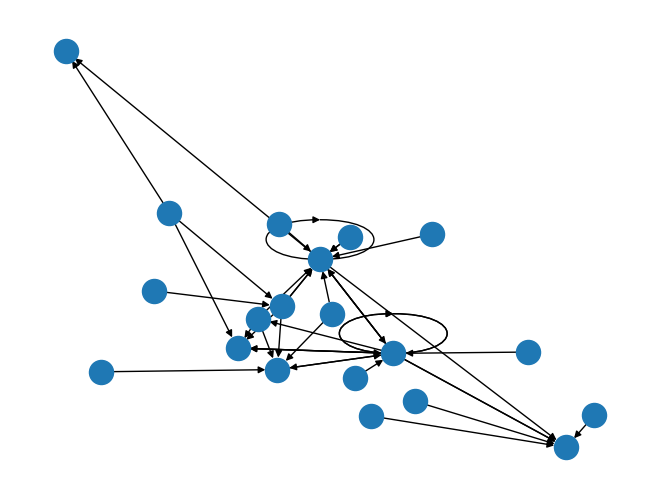

In [51]:
nx.draw(test_graph)

In [68]:
Sigma(
    graph=test_graph,

    # node config
    node_color='betweenness_centrality',
    node_color_gradient="Greens",
    node_size='betweenness_centrality',
    node_label='node_identifier',
    node_shape='node_type',
    node_shape_mapping={0 : 'circle', 1 : 'triangle', 2:'rectangle'},
    node_size_range=(8, 15),

    #edge config
    edge_color="f1",
    edge_color_gradient="Reds",
    # edge_size="f1",
    edge_label="f1",

    # # general config
    background_color="grey"

)

Sigma(nx.MultiDiGraph with 20 nodes and 39 edges)

## Pyviz

In [53]:
class MplColorHelper:

    def __init__(self, cmap_name, start_val, stop_val):
        self.cmap_name = cmap_name
        self.cmap = plt.get_cmap(cmap_name)
        self.norm = mpl.colors.Normalize(vmin=start_val, vmax=stop_val)
        self.scalarMap = cm.ScalarMappable(norm=self.norm, cmap=self.cmap)

    def get_rgba(self, val):
        return self.scalarMap.to_rgba(val, bytes=True)

    def get_rgb_str(self, val):
        r, g, b, a = self.get_rgba(val)
        return f"rgb({r},{g},{b})"

In [54]:
vals = nx.get_node_attributes(test_graph, 'betweenness_centrality').values()
betweenness_min, betweenness_max = min(vals), max(vals)
node_colors = MplColorHelper("Reds", betweenness_min, betweenness_max)
print(betweenness_min)
print(betweenness_max)
print(node_colors.get_rgb_str(0.02))
print(node_colors.get_rgb_str(0.2))
print(node_colors.get_rgb_str(1))

0.0
0.13011695906432746
rgb(253,215,199)
rgb(103,0,12)
rgb(103,0,12)


In [55]:
# prep node color generator
vals = nx.get_node_attributes(test_graph, 'betweenness_centrality').values()
betweenness_min, betweenness_max = min(vals), max(vals)
node_colors = MplColorHelper("Reds", betweenness_min, betweenness_max)

# prep edge color generator
vals = nx.get_edge_attributes(test_graph, 'f1').values()
val_min, val_max = min(vals), max(vals)
edge_colors = MplColorHelper("Reds", val_min, val_max)

for node, data in test_graph.nodes(data=True):
    data['value'] = data['betweenness_centrality'] # node size
    data['label'] = data['node_identifier'] 
    data['title'] = (
        f"Node: {data['node_identifier']}"
        "\nNode Features:" +
        f"\nfeature 1: {data['f1']}" + 
        f"\nfeature 2: {data['f2']}" + 
        f"\nfeature 3: {data['f3']}" + 
        f"\nBetweenness Centrality: {data['betweenness_centrality']}" + 
        f"\nDegree: {data['node-degree']}"
    ) 
    data['color'] = node_colors.get_rgb_str(data['betweenness_centrality'])
    
for u, v, data in test_graph.edges(data=True):
    data['value'] = data['f1']
    data['color'] = edge_colors.get_rgb_str(data['f1'])
    data['title'] = (
        f"Edge: {test_graph.nodes[u]['node_identifier']} -> {test_graph.nodes[v]['node_identifier']}" +
        f"\nEdge Features:" + 
        f"\nfeature 1: {data['f1']}" + 
        f"\nfeature 2: {data['f2']}"
    )

In [56]:
nt = Network('500px','1000px',notebook=True)
nt.show_buttons()
nt.from_nx(test_graph)
nt.show('nx.html')

nx.html
